## State-Space Search

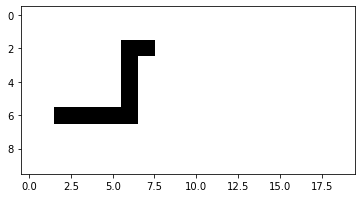

In [1]:
height = 10
width = 20
labyrinth = [[0 for c in range(width)] for r in range(height)]

for r in range(2, 7):
    labyrinth[r][6] = 1
    labyrinth[6][r] = 1
labyrinth[2][7] = 1

%matplotlib inline
import matplotlib.pyplot as pyplot
pyplot.imshow(labyrinth, cmap='Greys', interpolation='nearest');

## Advanced functions


In [2]:
start = (5, 5)

final = (8, 8)
is_final = lambda position: position == final

In [3]:
list(map(is_final, [(1,1), (3, 6), (8, 8)]))

[False, False, True]

In [4]:
list(filter(is_final, [(1,1), (3, 6), (8, 8)]))

[(8, 8)]

## The A* algorithm

### Task 0

Given a certain position represented by a `tuple`, find if its location is valid.


In [5]:
def verify_location(position):
    (x, y) = position
    if (x >= 0) and (x<height) and (y>=0) and (y<width) and (labyrinth[x][y]==0):
        return True
    return False

In [6]:
list(map(verify_location, [(-1,2), (height,3), (width,4), (5,5), (6,6), (0,9)])) 

[False, False, False, True, False, True]

**b.** Once you have verified the position, return its empty neighbours in a `list`.

In [7]:
def get_neighbours(position):
    result = []
    (x,y) = position
    result.append((x-1,y-1))
    result.append((x-1,y))
    result.append((x-1,y+1))
    result.append((x,y+1))
    result.append((x+1,y+1))
    result.append((x+1,y))
    result.append((x+1,y-1))
    result.append((x,y-1))
    result = list(filter(verify_location, result))
    return result

In [8]:

[get_neighbours(p) for p in [(0,9), (5,5)]]

[[(0, 10), (1, 10), (1, 9), (1, 8), (0, 8)], [(4, 4), (4, 5), (5, 4)]]

### Heuristic search


### Task 1

**a.** Compute the _Euclidean distance_:


In [9]:
from math import sqrt

In [10]:
def euclidean_distance(x, y):
    distance = sqrt((x[0]-y[0])*(x[0]-y[0])+(x[1]-y[1])*(x[1]-y[1]))
    return distance

In [11]:
euclidean_distance((2,3), (4, 7))

4.47213595499958

**b.** Compute the _Manhattan distance_:

In [12]:
def manhattan_distance(x, y):
    distance = abs(x[0]-x[1])+abs(y[0]-y[1])
    return distance

In [13]:
manhattan_distance((2,3), (4,0))

5

**Priority Queue**. 

In [14]:
from heapq import heappop, heappush

priority_queue = []
heappush(priority_queue, ((1, 2), 'cost_so_far: 2'))
heappush(priority_queue, ((0, 1), 'cost_so_far: 1'))
heappush(priority_queue, ((1, 4), 'cost_so_far: 3'))

print(heappop(priority_queue))
print(heappop(priority_queue))
print(heappop(priority_queue))

((0, 1), 'cost_so_far: 1')
((1, 2), 'cost_so_far: 2')
((1, 4), 'cost_so_far: 3')


### Task 2

**a.** Implement **A\*** 

In [15]:
from heapq import heappop, heappush

In [21]:
def astar(start, end, h):
    frontier = []
    heappush(frontier, (0 + h(start, end), start))
    discovered = {start: (None, 0)}
    while frontier:
        (estimated_cost, node) = heappop(frontier)
        if node != final:
            neighbours = get_neighbours(node)
            for n in neighbours:               
                gcost = estimated_cost - h(node, end)+1 
                cost = gcost + h(n, end)
                if n in discovered.keys():
                    if gcost < discovered[n][1]: 
                        heappush(frontier, (cost, n))
                        discovered[n] = (node, gcost)
                else:
                    heappush(frontier, (cost, n))
                    discovered[n] = (node, gcost)
        else:
            break
    cost_map = [[discovered[(r,c)][1] if (r,c) in discovered else 0 for c in range(width)]for r in range(height)]
    pyplot.imshow(cost_map , cmap='Greys', interpolation='nearest');        
    path = discovered
    return path 


{(5, 5): (None, 0),
 (4, 4): ((5, 5), 1.0),
 (4, 5): ((5, 5), 1.0),
 (5, 4): ((5, 5), 1.0),
 (3, 4): ((4, 5), 2.0),
 (3, 5): ((4, 5), 2.0),
 (4, 3): ((5, 4), 2.0),
 (5, 3): ((5, 4), 2.0),
 (3, 3): ((4, 4), 2.0),
 (2, 4): ((3, 5), 3.0),
 (2, 5): ((3, 5), 3.0),
 (4, 2): ((5, 3), 3.0),
 (5, 2): ((5, 3), 3.0),
 (2, 3): ((3, 4), 3.0),
 (3, 2): ((4, 3), 3.0),
 (2, 2): ((3, 3), 3.0),
 (1, 4): ((2, 5), 4.0),
 (1, 5): ((2, 5), 4.0),
 (1, 6): ((2, 5), 4.0),
 (4, 1): ((5, 2), 4.0),
 (6, 1): ((5, 2), 4.0),
 (5, 1): ((5, 2), 4.0),
 (1, 3): ((2, 3), 4.0),
 (3, 1): ((3, 2), 4.0),
 (1, 2): ((2, 3), 4.0),
 (2, 1): ((3, 2), 4.0),
 (0, 5): ((1, 6), 4.999999999999999),
 (0, 6): ((1, 6), 4.999999999999999),
 (0, 7): ((1, 6), 4.999999999999999),
 (1, 7): ((1, 6), 4.999999999999999),
 (5, 0): ((6, 1), 4.999999999999999),
 (7, 2): ((6, 1), 4.999999999999999),
 (7, 1): ((6, 1), 4.999999999999999),
 (7, 0): ((6, 1), 4.999999999999999),
 (6, 0): ((6, 1), 4.999999999999999),
 (7, 3): ((7, 2), 5.999999999999999),


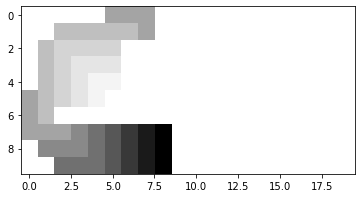

In [22]:
astar(start, final, euclidean_distance)

{(5, 5): (None, 0),
 (4, 4): ((5, 5), 1),
 (4, 5): ((5, 5), 1),
 (5, 4): ((5, 5), 1),
 (3, 3): ((4, 4), 2),
 (3, 4): ((4, 4), 2),
 (3, 5): ((4, 4), 2),
 (5, 3): ((4, 4), 2),
 (4, 3): ((4, 4), 2),
 (2, 2): ((3, 3), 3),
 (2, 3): ((3, 3), 3),
 (2, 4): ((3, 3), 3),
 (4, 2): ((3, 3), 3),
 (3, 2): ((3, 3), 3),
 (1, 1): ((2, 2), 4),
 (1, 2): ((2, 2), 4),
 (1, 3): ((2, 2), 4),
 (3, 1): ((2, 2), 4),
 (2, 1): ((2, 2), 4),
 (2, 5): ((3, 4), 3),
 (5, 2): ((4, 3), 3),
 (0, 0): ((1, 1), 5),
 (0, 1): ((1, 1), 5),
 (0, 2): ((1, 1), 5),
 (2, 0): ((1, 1), 5),
 (1, 0): ((1, 1), 5),
 (1, 4): ((2, 3), 4),
 (4, 1): ((3, 2), 4),
 (0, 3): ((1, 2), 5),
 (3, 0): ((2, 1), 5),
 (1, 5): ((2, 4), 4),
 (5, 1): ((4, 2), 4),
 (0, 4): ((1, 3), 5),
 (1, 6): ((2, 5), 4),
 (4, 0): ((3, 1), 5),
 (6, 1): ((5, 2), 4),
 (0, 5): ((1, 4), 5),
 (5, 0): ((4, 1), 5),
 (0, 6): ((1, 5), 5),
 (6, 0): ((5, 1), 5),
 (0, 7): ((1, 6), 5),
 (1, 7): ((1, 6), 5),
 (7, 2): ((6, 1), 5),
 (7, 1): ((6, 1), 5),
 (7, 0): ((6, 1), 5),
 (7, 3): ((7

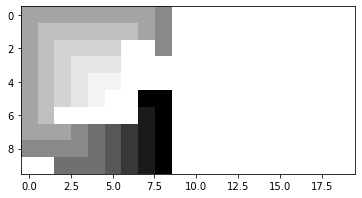

In [23]:
astar(start, final, manhattan_distance)